#### Question 18

In [4]:
library(igraph)
library(entropy)

egoNodes <- dir("gplus",pattern = "circles")
print(paste("There are ", length(egoNodes), " personal networks in total."))

[1] "There are  132  personal networks in total."


#### Question 19

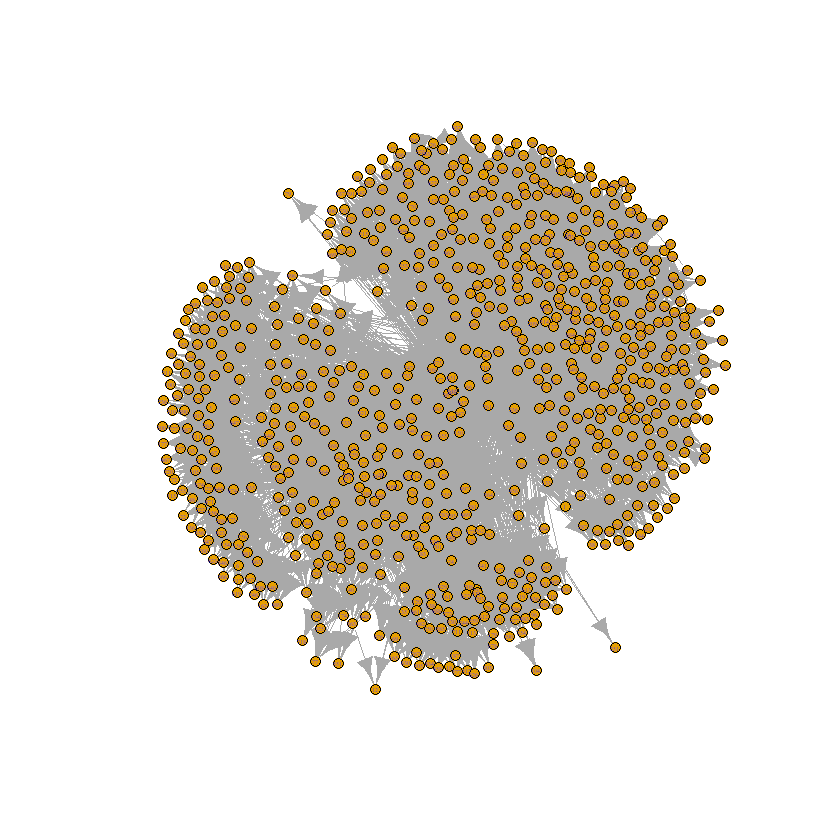

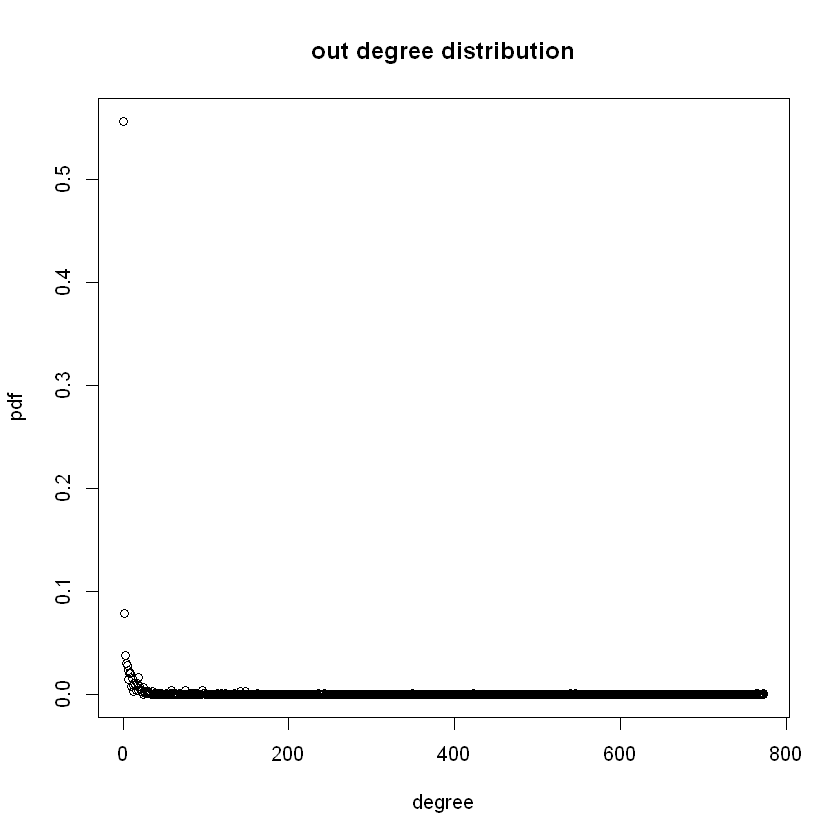

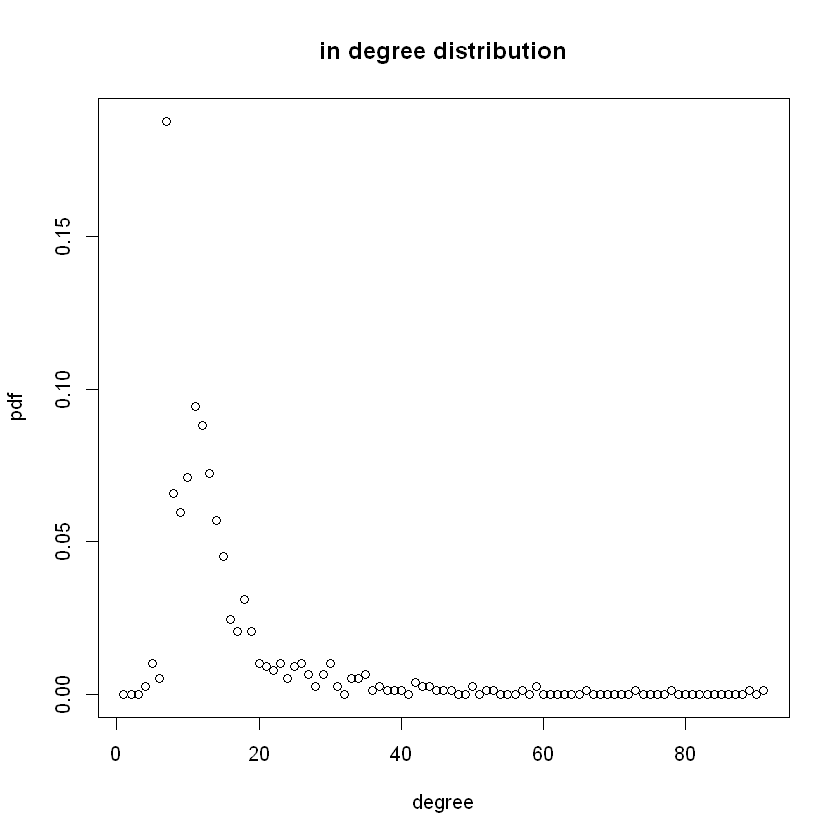

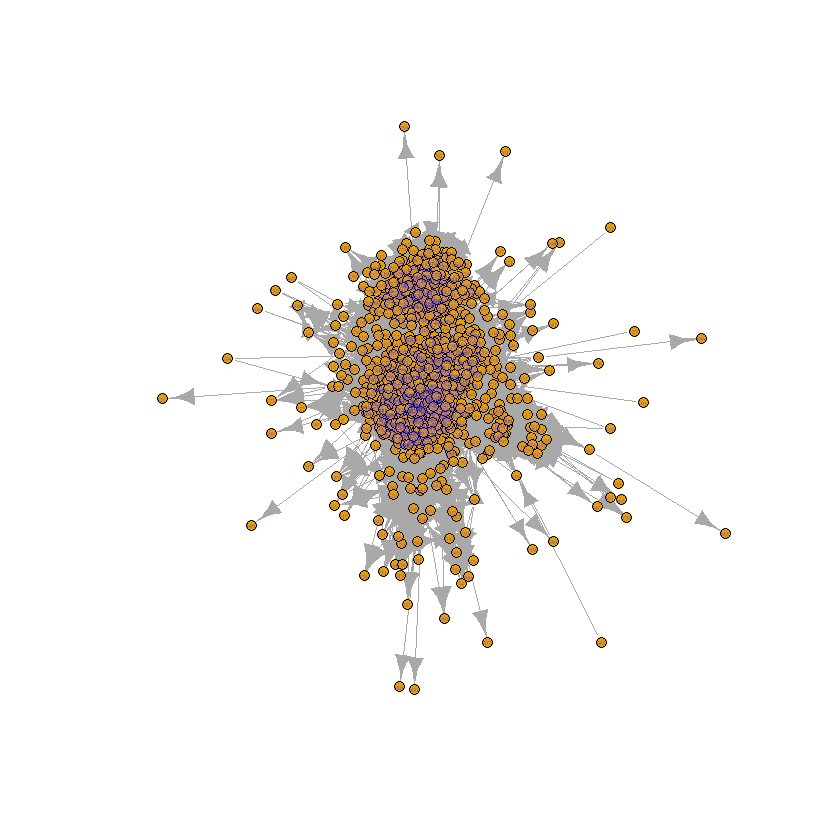

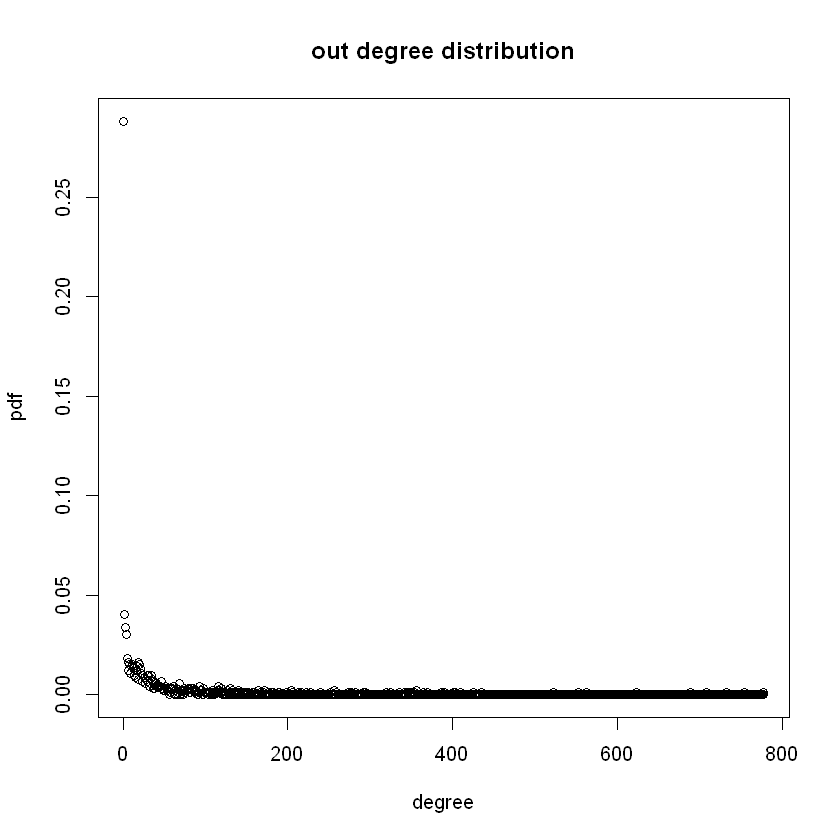

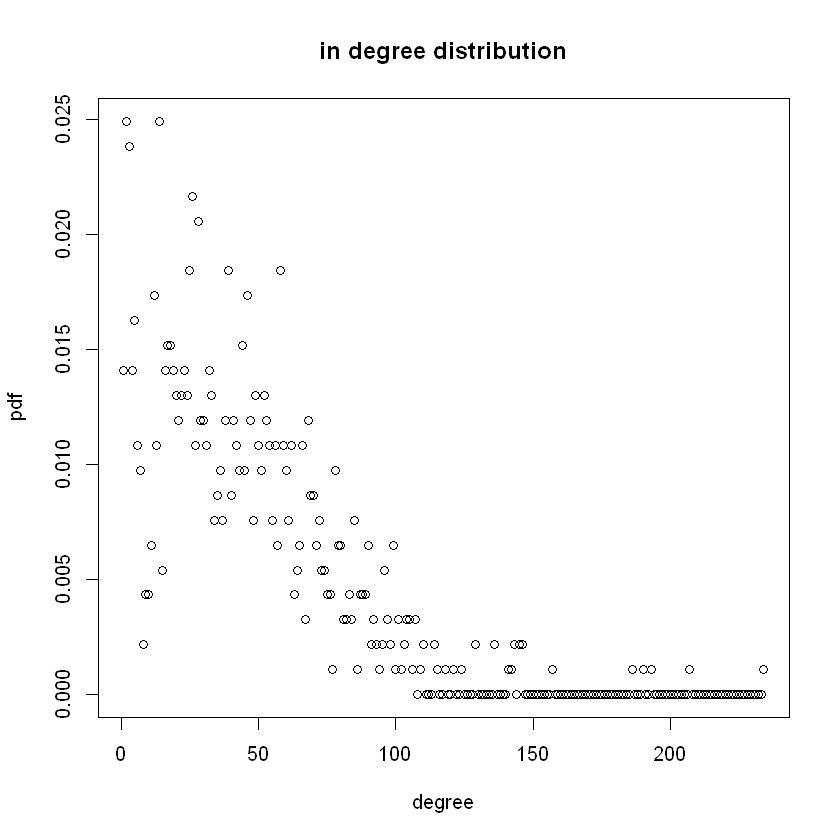

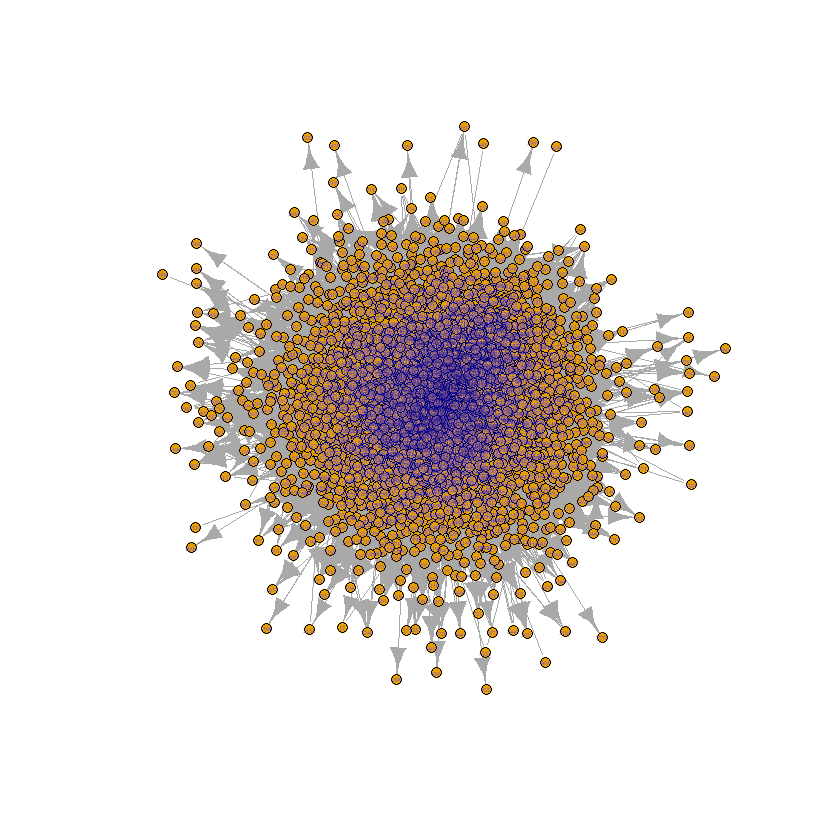

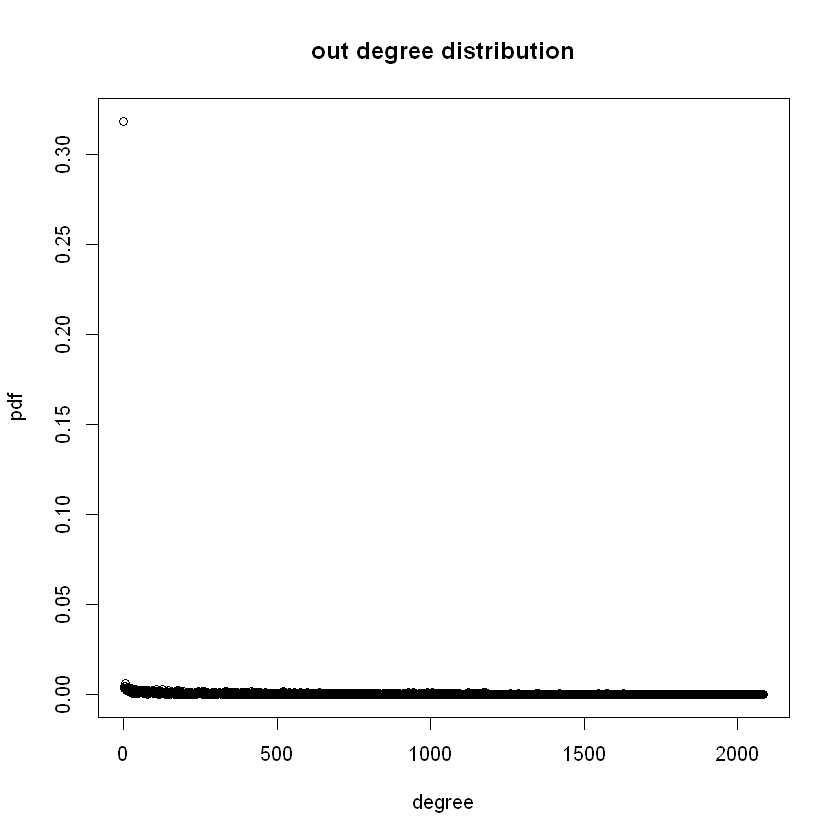

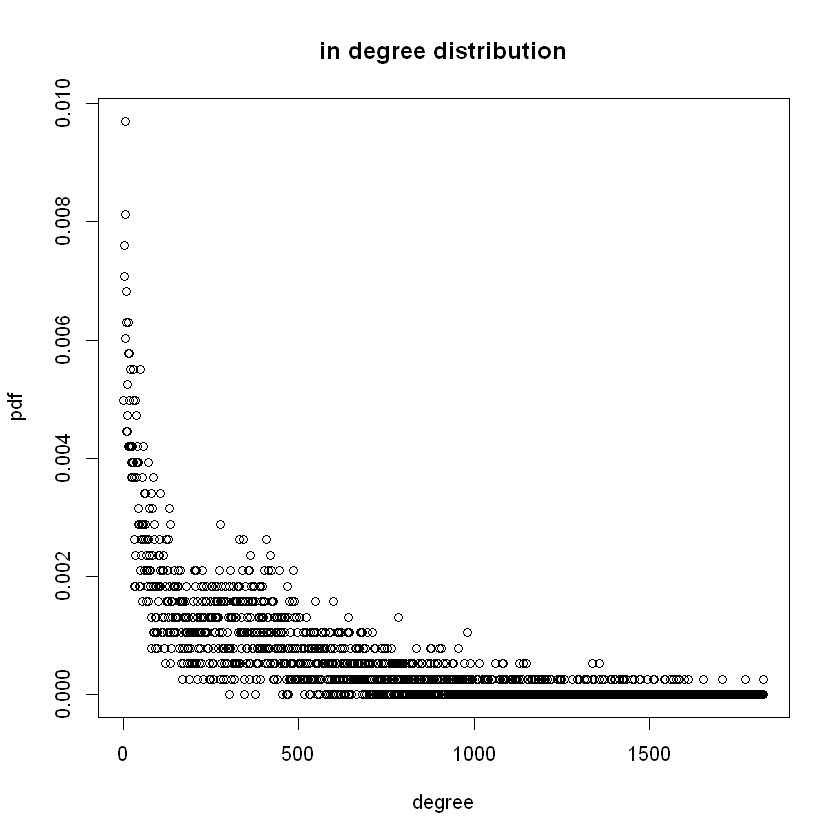

In [5]:
node2plot <- c("109327480479767108490", 
               "115625564993990145546", 
               "101373961279443806744")

create_graph = function(id, plot = FALSE){
    file2plot <- paste("gplus/", id, sep="")
    edge_file <- paste(file2plot, ".edges", sep="")
    edge_list <- scan(edge_file, what=numeric())
    edge_list <- matrix(as.numeric(factor(edge_list)), nc = 2, byrow = TRUE)
    g = graph_from_edgelist(edge_list)
    plot(g, vertex.size=4, vertex.label.cex=0.3)
    
    if (plot){
        plot(degree.distribution(g,mode="out"), main="out degree distribution",xlab="degree",ylab="pdf")
        plot(degree.distribution(g,mode="in"), main="in degree distribution",xlab="degree",ylab="pdf")
    }
    return(g)
}

g1 = create_graph(node2plot[1], T)
g2 = create_graph(node2plot[2], T)
g3 = create_graph(node2plot[3], T)

#### Question 20

In [ ]:
walk1 = walktrap.community(g1)
print(paste("Modularity score is ", modularity(walk1)))

In [2]:
general_filenames <- list()
for (i in 1:length(egoNodes))
{
  general_filenames[[i]] <- strsplit(egoNodes[i],".circles")
  circles_file <- paste("gplus/", general_filenames[[i]], ".circles", sep="")
  file_connection <- file(circles_file , open="r")
  circles <- readLines(file_connection)
  close(file_connection)
  
  # check if more than 2 circles
  if(length(circles) > 2)
  {
    all_circles <- list()
    for (c in 1:length(circles)) 
    {
      content <- strsplit(circles[c],"\t")
      all_circles <- c(all_circles, list(content[[1]][-1]))
    }
  
    edges_file <- paste("gplus/", general_filenames[[i]], ".edges", sep="")
    google_network <- read.graph(edges_file, format = "ncol", directed=TRUE)
    google_network <- add.vertices(google_network, nv = 1, name = general_filenames[[i]])
    
    edge_list <- c()
    for (node in 1:(vcount(google_network)-1))
    {
      edge_list <- c(edge_list, c(vcount(google_network), node))
    }
    
    google_network <- add_edges(google_network, edge_list)
    
    info_map_community <- infomap.community(google_network)
    walk_trap_community <- walktrap.community(google_network)
    
    info_map_overlap_ratio <- vector()
    walk_trap_overlap_ratio <- vector()
    for(x in 1:max(info_map_community$membership))
    {
      info_map_community_nodes = V(google_network)$name[which(info_map_community$membership == x)]
      
      for (c in 1:length(all_circles))
      {
        union_nodes <- length(union(info_map_community_nodes, all_circles[[c]]))
        info_map_overlap_ratio = c(info_map_overlap_ratio, length(intersect(info_map_community_nodes, all_circles[[c]]))/union_nodes)
      }
    }
    
    for(x in 1:max(walk_trap_community$membership))
    {
      walk_trap_community_nodes = V(google_network)$name[which(walk_trap_community$membership == x)]
      
      for (c in 1:length(all_circles))
      {
        union_nodes <- length(union(walk_trap_community_nodes, all_circles[[c]]))
        walk_trap_overlap_ratio = c(walk_trap_overlap_ratio, length(intersect(walk_trap_community_nodes, all_circles[[c]]))/union_nodes)
      }
    }

    print(paste("Number of circles = ", length(all_circles)))
    print(paste("Walktrap ratio (MAX) =  ",max(walk_trap_overlap_ratio)))
    print(paste("Walktrap ratio (AVG) =  ",mean(walk_trap_overlap_ratio)))
    print(paste("Infomap ratio (MAX) = ",max(info_map_overlap_ratio)))
    print(paste("Infomap ratio (AVG) = ",mean(info_map_overlap_ratio)))
  
  }
}

[1] "Number of circles =  4"
[1] "Walktrap ratio (MAX) =   0.529331514324693"
[1] "Walktrap ratio (AVG) =   0.0826457723531556"
[1] "Infomap ratio (MAX) =  0.43677130044843"
[1] "Infomap ratio (AVG) =  0.0140909714519929"
[1] "Number of circles =  3"
[1] "Walktrap ratio (MAX) =   0.677710843373494"
[1] "Walktrap ratio (AVG) =   0.100678018021018"
[1] "Infomap ratio (MAX) =  0.459302325581395"
[1] "Infomap ratio (AVG) =  0.0386222090734326"
[1] "Number of circles =  4"
[1] "Walktrap ratio (MAX) =   0.0763358778625954"
[1] "Walktrap ratio (AVG) =   0.00211326088720709"
[1] "Infomap ratio (MAX) =  0.105304518664047"
[1] "Infomap ratio (AVG) =  0.00454322200392927"
[1] "Number of circles =  3"
[1] "Walktrap ratio (MAX) =   0.212121212121212"
[1] "Walktrap ratio (AVG) =   0.0378792205075374"
[1] "Infomap ratio (MAX) =  0.321100917431193"
[1] "Infomap ratio (AVG) =  0.0139666796386896"
[1] "Number of circles =  4"
[1] "Walktrap ratio (MAX) =   0.0774526678141136"
[1] "Walktrap ratio (AVG) = 